In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1], dtype = np.float64)

### 1. *Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log.

In [3]:
def calc_logloss(y, y_pred):
    return np.mean(- y * np.log(np.clip(y_pred, 1e-12, np.inf)) - (1.0 - y) * np.log(1.0 - np.clip(y_pred, -np.inf, 1 - 1e-12)))

### 2. Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.


In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [5]:
def calc_std(x):
    return (x - x.mean()) / x.std()

In [6]:
def eval_model(X, y, iterations, eta=1e-4):
    
    np.random.seed(42)
    w = np.random.randn(X.shape[0])
    n = X.shape[1]
    
    for i in range(1, iterations + 1):    
        
        z = np.dot(w, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        w -= eta * (1/n * np.dot((y_pred - y), X.T))
    
    return err, w

In [7]:
X_st = calc_std(X)

In [8]:
error_logloss = []
eta = np.linspace(1e-8, 1e1, num=20)
for it in eta:
    e = eval_model(X_st, y, iterations=1000, eta=it)[0]
    error_logloss.append(e)
# print(error_logloss)

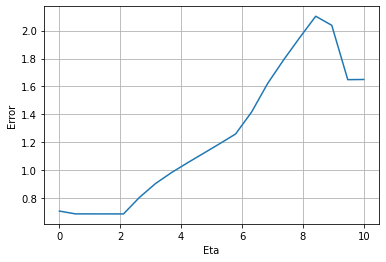

In [9]:
plt.plot(eta, error_logloss)
plt.xlabel('Eta')
plt.ylabel('Error')
plt.grid()
plt.show()

In [10]:
error_logloss = []
eta = np.linspace(0.5, 2.162, num=100)
for it in eta:
    e = eval_model(X_st, y, iterations=1000, eta=it)[0]
    error_logloss.append(e)
# print(error_logloss)

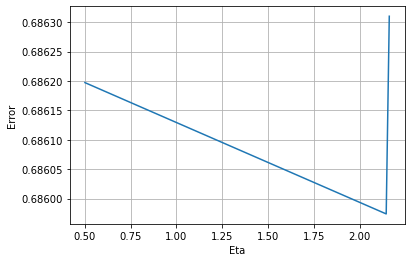

In [11]:
plt.plot(eta, error_logloss)
plt.xlabel('Eta')
plt.ylabel('Error')
plt.grid()
plt.show()

In [12]:
min_error = eta[error_logloss.index(min(error_logloss))]

In [13]:
print(f'Минимальный logloss - {min(error_logloss)}, при значении eta = {min_error}')

Минимальный logloss - 0.6859739670556694, при значении eta = 2.145212121212121


### 3. Создайте функцию calc_pred_proba, возвращающую предсказанную вероятность класса 1 (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred_proba).

In [20]:
def calc_pred_proba(w, x):
    return sigmoid(np.dot(w, x))

In [21]:
min_w = eval_model(X_st, y, iterations=1000, eta=min_error)[1]

In [22]:
y_pred_proba = calc_pred_proba(min_w, X_st)
y_pred_proba

array([0.44388748, 0.4676634 , 0.47391313, 0.45575023, 0.55695403,
       0.48018804, 0.5625684 , 0.61769234, 0.43797916, 0.50384945])

### 4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [23]:
def calc_pred(w, x, t_value=0.5):
    pred_class = calc_pred_proba(w, x)
    for val in range(len(pred_class)):
        pred_class[val] = 0 if pred_class[val] < t_value else 1
    return pred_class

### 5. *Реализуйте функции для подсчета Accuracy, матрицы ошибок, точности и полноты, а также F1 score.

In [24]:
def accuracy(y_pred, y):
    done = 0
    for elem in range(len(y)):
        if y_pred[elem] == y[elem]:
            done += 1
    return done / len(y)

In [25]:
accuracy(calc_pred(min_w, X_st), y)

0.7

In [26]:
def confusion_matrix(y_pred, y):
    tp = 0
    tn = 0
    fp = 0
    fn = 0

    for val in range(len(y)):
        if y[val] == y_pred[val]:
            if y[val]:
                tp += 1
            else:
                tn += 1
        else:
            if y[val]:
                fp += 1
            else:
                tn += 1
    
    return tp, fp, fn, tn

In [27]:
tp, fp, fn, tn = confusion_matrix(calc_pred(min_w, X_st), y)

In [28]:
precision = tp / (tp + fp)

In [29]:
recall = tp / (tp + fn)

In [30]:
f1_score = (2 * precision * recall) / (precision + recall)

In [31]:
print(f'Precision = {precision}, Recall = {recall}, F1-score = {f1_score}')

Precision = 0.6, Recall = 1.0, F1-score = 0.7499999999999999


### 6. Могла ли модель переобучиться? Почему?

Recall = 1, поэтому можно говорить о переобучении, но данных мало.